# Tarea 2: Regresión Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
mnist = fetch_openml('mnist_784')

Muestra de la primera imagen del dataset

In [25]:
img = mnist['data'].to_numpy()
img = img[0,:].reshape(28,28)
label = mnist['target'][0]

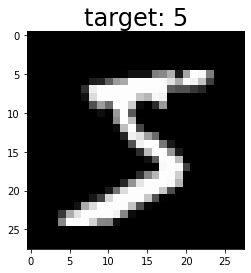

In [26]:
plt.imshow(img, cmap='gray')
plt.title(f"target: {label}", size=24)
plt.show()

In [3]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist['data'], mnist['target'], test_size=0.2, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

Se intentó crear un modelo con los solvers newton-cg y saga, sin embargo, demoraban mucho en entrenar y no presentaban un resultado más significativo. El solver lbfgs fue más rápido y si bien no pudo llegar a converger, alcanzó una eficiencia de 91.7%

In [5]:
model = LogisticRegression(solver='lbfgs',max_iter=100)

In [6]:
model.fit(train_img, train_lbl)

C:\Users\nelso\anaconda3\envs\topicos_1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
score = model.score(test_img, test_lbl)
score

0.9172142857142858

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [9]:
y_pred = model.predict(test_img)
cm = confusion_matrix(test_lbl, y_pred)

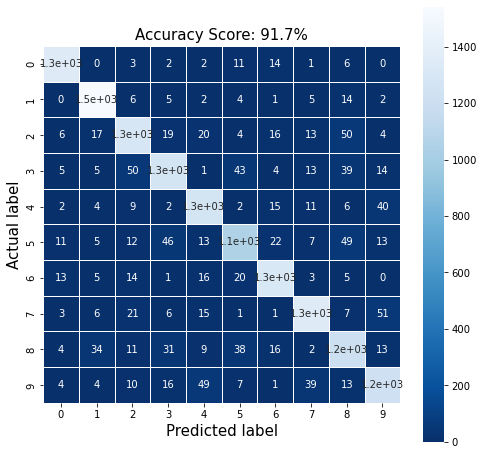

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
plt.title(f'Accuracy Score: {np.round(100*score,1)}%', size = 15)
plt.show()